<a href="https://colab.research.google.com/github/boongtol1/2025-1-myclass-BDA/blob/main/inclass/13w_A_mon_0609_easy_ch10_text_mining_BTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13주 BTS 댓글 워드 클라우드

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 82.6 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

In [ ]:
!find / -name NanumGothic.ttf

/usr/local/lib/python3.11/dist-packages/koreanize_matplotlib/fonts/NanumGothic.ttf
find: ‘/proc/69/task/69/net’: Invalid argument
find: ‘/proc/69/net’: Invalid argument


In [ ]:
FONT_PATH = '/usr/local/lib/python3.11/dist-packages/koreanize_matplotlib/fonts/NanumGothic.ttf'

In [ ]:
!pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 38.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 50 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 5.71 MiB | 5.42 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [ ]:
df = pd.read_csv('data/news_comment_BTS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [ ]:
df.reply[:10]

,reply
0,국보소년단<U+0001F49C>
1,아줌마가 들어도 좋더라
2,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
4,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요"
5,정국오빠 생일과 더불어 빌보드 1위기사라니ㅠㅠ축제구나
6,정말 축하하고 응원하지만\n집에서 여러 계정으로 스트리밍 돌리고 사재기하고 다른 팬...
7,"기자는 자고 일어났지만, 팬들은 못자고 발표 기다림"
8,자랑스럽다!!!!!! 축하합니다!!!!
9,SuperM 늘 응원하고 사랑합니다~


In [ ]:
df.sample(5)

,reg_time,reply,press,title,url
188,2020-09-01 12:02:50,온몸에 소름돋아 너무 기쁘고 좋아서,중앙일보,BTS '다이너마이트' 터졌다···韓 가수 최초 빌보드 싱글1위,https://news.naver.com/main/read.nhn?mode=LSD&...
1069,2020-09-01 02:56:14,개미쳤네 싸이도2위한건데,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...
1092,2020-09-01 10:32:49,사이,KBS,BTS ‘다이너마이트’ 빌보드 핫100 1위 등극…한국 뮤지션 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
132,2020-09-01 06:36:58,아니 진짜 군면제하자 뭘더 얼마나 일등을 해야해 국내 클래식 콩쿨 1등해도 면제해주...,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
1034,2020-09-01 02:59:07,역시 ㅜㅜㅜ 그럴 줄 알았어 ㅜㅜㅜ 자랑스러워 ㅜㅜㅜ,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...


In [ ]:
df['reply'].str.replace('[^가-힣]',' ',regex=True)

,reply
0,국보소년단
1,아줌마가 들어도 좋더라
2,팩트체크 현재 빌보드 위 방탄소년단 위 ...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 우리오래오래 함께하자
4,대단한 월드 클래스는 다르네 좋은 소식 응원해요
...,...
1195,역시
1196,우리 탄이들 너무 자랑스럽고 사랑해 ...
1197,이런애들 꼭 군대를 보내 는게 맞을까요
1198,군면제급이다 이건


In [ ]:
df['reply'].str.replace('[^가-힣]',' ',regex=True)
df['reply'].sample(5)

,reply
948,힘든시기에 행복한 뉴스
469,국뽕차오른다.\n한국인가수가 미국빌보드 그것도ㅈ싱글차트 핫100에서\n1위라니....
685,사랑해요 BTS
110,정말 축하합니다 자랑스러운 한국가수!!ㅠㅠㅠ보이밴드중 역사상 4번째로 빌보드 핫10...
43,이정도 국위선양이면 군면제 해줘도 될듯싶다. 스포츠인만 국위선양이라고 볼수없지 않나...


In [ ]:
from konlpy.tag import Hannanum
han=Hannanum()
han.nouns(u'질문이나 건의사항은 깃헙 이슈 트레커에 남겨주세요.')

['질문', '건의사항', '깃헙', '이슈', '트레커']

In [ ]:
from konlpy.tag import Kkma
kkma=Kkma()
kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트레커에 남겨주세요.')

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트레커']

In [ ]:
mydf = pd.DataFrame({'A': [1,2,3],'B': [4,5,6]})
mydf

,A,B
0,1,4
1,2,5
2,3,6


In [ ]:
dfs = mydf.apply(lambda x: x**2)
dfs

,A,B
0,1,16
1,4,25
2,9,36


In [ ]:
dfs = mydf.apply(lambda x: x + 2)
dfs

,A,B
0,3,6
1,4,7
2,5,8


In [ ]:
df['reply'].sample(5)

,reply
868,자랑스럽다진짜 눈물난다 너희가 나의 힘이고 비타민이고 빛이다<U+0001F49C>
262,정은경 봉준호 순시리 시절엔 징계받고 블랙리스트 올랐다...bts도 순시리 시절이었...
63,자꾸 떠들면 트럼프가 시기한다.. 적당히 해라 기레기야
1106,대단하다 박수
822,방탄 정말 축하해<U+0001F49C>


In [ ]:
nouns = df['reply'].apply(kkma.nouns)
nouns

,reply
0,"[국보, 국보소년단, 소년단, 0001, 49]"
1,[아줌마]
2,"[팩트, 팩트체크, 체크, 보드, 100, 1, 1위, 위, 방탄, 방탄소년단, 소..."
3,"[방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]"
4,"[월드, 클래스, 소식, 응원]"
...,...
1195,[]
1196,"[우리, 탄, 자랑, 사랑, 0001, 49]"
1197,"[애, 군대]"
1198,"[군, 군면제급, 면제, 급]"


In [ ]:
nouns = nouns.explode()
nouns

,reply
0,국보
0,국보소년단
0,소년단
0,0001
0,49
...,...
1199,전
1199,전정국
1199,정국
1199,0001


In [ ]:
test = pd.DataFrame({
    'A': [[1, 2, 3], 'foo', [], [3, 4]],
    'B': [1, 2, 3, 4],
    'C': [['a', 'b', 'c'], np.nan, [], ['d', 'e']]
})
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,2,NaN
2,[],3,[]
3,"[3, 4]",4,"[d, e]"


In [ ]:
test.explode(['A','C']) # 기말 시험 예상

,A,B,C
0,1,1,a
0,2,1,b
0,3,1,c
1,foo,2,NaN
2,NaN,3,NaN
3,3,4,d
3,4,4,e


In [ ]:
df_word = pd.DataFrame({'words': nouns})
df_word.sample(5)

,words
470,년
800,부담
864,레전
145,코로나
1116,횡령


In [ ]:
df_word['len'] = df_word['words'].str.len()
df_word = df_word.query('len>=2')
df_word.sample(5)

,words,length,leㅜ,len
816,최고,2.0,2.0,2.0
283,발라드,3.0,3.0,3.0
493,다음기회,4.0,4.0,4.0
547,대사,2.0,2.0,2.0
658,인물,2.0,2.0,2.0


In [ ]:
df_word.query('words == "소년단"')

,words,length,leㅜ,len
0,소년단,3.0,3.0,3.0
2,소년단,3.0,3.0,3.0
3,소년단,3.0,3.0,3.0
27,소년단,3.0,3.0,3.0
29,소년단,3.0,3.0,3.0
...,...,...,...,...
1123,소년단,3.0,3.0,3.0
1159,소년단,3.0,3.0,3.0
1162,소년단,3.0,3.0,3.0
1164,소년단,3.0,3.0,3.0


In [ ]:
df_word = df_word.groupby('words', as_index=False) \
    .agg(n=('words', 'count')) \
    .sort_values('n', ascending=False)
df_word

,words,n
2366,힘내,1
0,0001,1
1,08,1
2,08년,1
3,10,1
...,...,...
34,1등하,1
35,1등하면,1
36,1박2일,1
37,1번,1


In [ ]:
top20 = df_word.head(20)
top20

,words,n
2366,힘내,1
0,0001,1
1,08,1
2,08년,1
3,10,1
4,100,1
5,1000,1
6,1000억이상,1
7,1000억정도,1
8,1001,1


<Axes: xlabel='n', ylabel='words'>

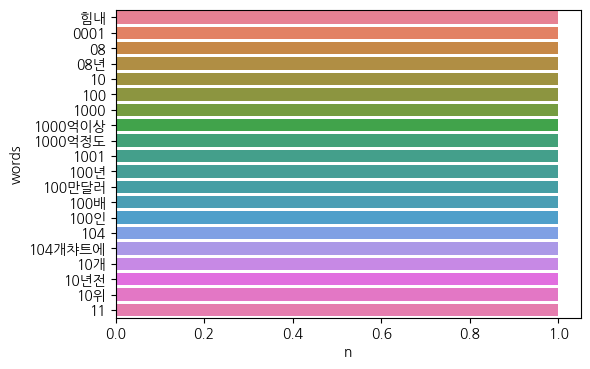

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=top20, y='words',x='n',hue='words')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
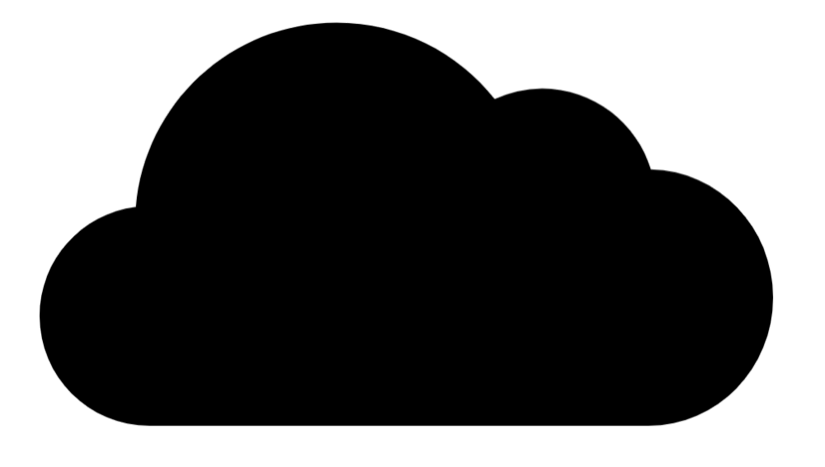

In [ ]:
from PIL import Image

icon = Image.open('data/cloud.png')

img = Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)

img = np.array(img)
img


In [ ]:
df_word.sample(5)

,words,n
319,고장,1
2051,촬영,1
554,년대,1
1259,수상,1
473,기덕,1


In [ ]:
dic_word = df_word.set_index('words').to_dict()['n']
dic_word

{'힘내': 1,
 '0001': 1,
 '08': 1,
 '08년': 1,
 '10': 1,
 '100': 1,
 '1000': 1,
 '1000억이상': 1,
 '1000억정도': 1,
 '1001': 1,
 '100년': 1,
 '100만달러': 1,
 '100배': 1,
 '100인': 1,
 '104': 1,
 '104개챠트에': 1,
 '10개': 1,
 '10년전': 1,
 '10위': 1,
 '11': 1,
 '111': 1,
 '1160': 1,
 '1160만명': 1,
 '1160만회': 1,
 '11공수': 1,
 '1300489084222279680': 1,
 '14': 1,
 '14주': 1,
 '15': 1,
 '15년': 1,
 '18': 1,
 '화력': 1,
 '화이팅': 1,
 '화이팅되': 1,
 '확보': 1,
 '환멸': 1,
 '환치기': 1,
 '활개': 1,
 '활동': 1,
 '호중': 1,
 '혼란': 1,
 '홈페이지': 1,
 '홍보': 1,
 '홍보대사': 1,
 '홍보도': 1,
 '홍보사진': 1,
 '화가': 1,
 '형님': 1,
 '형평': 1,
 '혜택': 1,
 '호들갑': 1,
 '호르몬': 1,
 '호르몬전쟁': 1,
 '호석': 1,
 '호의적': 1,
 '행사': 1,
 '헝헝': 1,
 '현대': 1,
 '현대적': 1,
 '현실': 1,
 '현역': 1,
 '현재': 1,
 '현존': 1,
 '3번째': 1,
 '3시': 1,
 '3위': 1,
 '3위가도': 1,
 '3팀': 1,
 '40': 1,
 '40대': 1,
 '40세': 1,
 '38': 1,
 '382': 1,
 '386': 1,
 '387': 1,
 '389': 1,
 '3년': 1,
 '3대': 1,
 '3번': 1,
 '2764': 1,
 '2년': 1,
 '2년동안': 1,
 '2년만': 1,
 '2위': 1,
 '30': 1,
 '30개월': 1,
 '30대': 1,
 '20억': 1,
 '20위': 1,
 '2